# Primera parte preprocesamiento de texto

In [524]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize 
from nltk.corpus import wordnet
from nltk.corpus import treebank
from nltk.corpus import stopwords
import wordcloud                                        #Generar Nube de palabras
from wordcloud import WordCloud, ImageColorGenerator    #Generar Nube de palabras 
from textblob import TextBlob                           #Sirve para hacer análisis de sentimientos
import seaborn as sns
import matplotlib.pyplot as plt
import re                                               # Para expresiones irregulares
from PIL import Image                                   # Cargar la imagen que queremos
from stylecloud import gen_stylecloud                   # para generar la imagen de la nube de palabras
import unicodedata   
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer     #polaridad del texto

In [525]:
sesna = pd.read_excel('tuits.xlsx', sheet_name='sesna') #Traemos nuestro documento y la hoja en donde se encuentran los Tweets
sesna.head()                                            #Llamamos a los primeros  5 registros
#sesna = pd.read_csv('AirlineTweets.csv') 
#sesna.head()

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,is_quote_status,retweet_count,favorite_count,favorited,New
0,1,2023-01-13 13:59:00,1613898409366224896,1613898409366224898,#Convenio \n\n??️ Revive el evento donde la #S...,False,221,NaN,NaN,NaN,NaN,NaN,NaN,False,0,1,False,True
1,2,2023-01-13 00:08:44,1613689467923038208,1613689467923038211,"?? Noel Díaz Rodríguez, Fiscal Especializado A...",False,277,NaN,NaN,NaN,NaN,NaN,NaN,False,1,6,False,True
2,3,2023-01-12 23:01:54,1613672645970501632,1613672645970501634,"✍️@morenoroberto77, Titular de #SESNA, en reun...",False,280,NaN,NaN,NaN,NaN,NaN,NaN,False,4,15,False,True
3,4,2023-01-12 18:40:12,1613606788783276032,1613606788783276066,#Querétaro \n#FederalismoAnticorrupción\n#Form...,False,49,NaN,NaN,NaN,NaN,NaN,NaN,True,0,0,False,True
4,5,2023-01-12 18:10:00,1613599188125888512,1613599188125888512,#EstadoDeMéxico \n#Anticorrupción\n#Federalism...,False,59,NaN,NaN,NaN,NaN,NaN,NaN,True,2,4,False,True


In [526]:
# drop unnecesary columns
sesna = sesna.drop(['Unnamed: 0', 'id', 'id_str', 'truncated', 'display_text_range','in_reply_to_status_id',
              'in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str', 'in_reply_to_screen_name',
             'geo', 'is_quote_status', 'favorited', 'favorite_count'], axis=1)
sesna.head()

,created_at,full_text,retweet_count,New
0,2023-01-13 13:59:00,#Convenio \n\n??️ Revive el evento donde la #S...,0,True
1,2023-01-13 00:08:44,"?? Noel Díaz Rodríguez, Fiscal Especializado A...",1,True
2,2023-01-12 23:01:54,"✍️@morenoroberto77, Titular de #SESNA, en reun...",4,True
3,2023-01-12 18:40:12,#Querétaro \n#FederalismoAnticorrupción\n#Form...,0,True
4,2023-01-12 18:10:00,#EstadoDeMéxico \n#Anticorrupción\n#Federalism...,2,True


In [527]:
# Patron de https, nota: verificar patron (puede ser mucho más preciso, son diez digitos y letras despues de https://t.cof/
patron = 'https://([^ ]*)'    
#re.findall(patron, sesna['full_text'][0])
sesna['full_text'] = sesna["full_text"].str.replace(patron, '')
sesna['full_text'] = sesna["full_text"].str.replace('https', '')

C:\Users\ccamacho\AppData\Local\Temp\ipykernel_8900\1804305231.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  sesna['full_text'] = sesna["full_text"].str.replace(patron, '')


In [528]:
#Este código está creando una nueva columna llamada "n_urls" en el DataFrame.
# El método apply() se usa aquí para aplicar una función lambda a cada fila del DataFrame. La función lambda busca URLs en el contenido del mensaje en cada fila y devuelve una lista de todas las URLs encontradas en esa fila. La función re.findall() se utiliza para buscar todas las instancias de "http://" y "https://" en el contenido del mensaje.
# Luego, la función lambda devuelve la suma de las dos listas creadas por las dos llamadas a la función re.findall(). Esto devuelve una lista con todas las URLs encontradas en la fila.
# Finalmente, la función apply() establece la columna "n_urls" en el número de elementos en esta lista (es decir, el número de URLs encontradas en el mensaje).

sesna["n_urls"] = sesna.apply(lambda x:re.findall("http://", x["full_text"]) + re.findall("https://", x["full_text"]), axis = 1)
sesna.head()

,created_at,full_text,retweet_count,New,n_urls
0,2023-01-13 13:59:00,#Convenio \n\n??️ Revive el evento donde la #S...,0,True,[]
1,2023-01-13 00:08:44,"?? Noel Díaz Rodríguez, Fiscal Especializado A...",1,True,[]
2,2023-01-12 23:01:54,"✍️@morenoroberto77, Titular de #SESNA, en reun...",4,True,[]
3,2023-01-12 18:40:12,#Querétaro \n#FederalismoAnticorrupción\n#Form...,0,True,[]
4,2023-01-12 18:10:00,#EstadoDeMéxico \n#Anticorrupción\n#Federalism...,2,True,[]


In [529]:
sum(sesna['n_urls'].str.len()) # Comprobamos que ya no tengamos https://t.cof

0

In [422]:
# sesna["full_text"].str.len()  #Cuantos caracteres tenemos por cada tweet

In [530]:
# Este código devuelve un subconjunto de filas del DataFrame, que contienen la cadena de caracteres "br" en la columna "full_text". El método str.contains() es utilizado para buscar patrones de caracteres en una cadena. 
# Nota: En este caso, "br" es una etiqueta HTML que se utiliza para crear un salto de línea en una página web.
sesna[sesna["full_text"].str.contains("br")]

,created_at,full_text,retweet_count,New,n_urls
9,2023-01-11 23:00:32,#Entérate \n\n??Visita los sistemas de la #PDN...,2,True,[]
26,2023-01-04 18:00:30,#TomaNota \n\n??Conoce la experiencia que vivi...,2,True,[]
29,2023-01-02 18:43:38,?? #SESNA celebra la designación del Magistra...,6,True,[]
30,2023-01-02 18:00:01,"✅ @pacoalvarezc , Presidente ??del @ComiteCPC,...",4,True,[]
33,2022-12-28 18:01:30,#ConoceMás\n\nConoce la opinión de expertos so...,5,True,[]
...,...,...,...,...,...
954,2022-08-03 19:47:28,"??\n??Al recibir el premio, @pauvallejos dijo...",4,True,[]
971,2022-08-01 14:57:02,??\n✅ Resultados: 2da quincena de noviembre y ...,0,True,[]
972,2022-08-01 14:56:27,??\n✅ Está compuesto por cinco categorías: inv...,0,True,[]
975,2022-08-01 12:59:00,#Entérate \n\n?? El 75% de los estados de la R...,13,True,[]


In [531]:
# Ahora eliminaremos las palabras que no nos aportan información relevante
# Esta línea de código la ocupamos para traer nuestra stopwords como de, el, es, etc. es un archivo txt.
df_stopwords = pd.read_csv('stopwords.txt', names=['word'], header=None)
stop_words = df_stopwords['word'].tolist()            # lo Tranformamos a una lista 

In [532]:
#Definimos la función para poder ocupar nuestras stopwords
def remove_stop_words_from_text(text):
    res = []
    subwords = re.findall(r'\S+', text)
    for item in subwords:
        if not item in stop_words:
            res.append(item)
    return res

In [533]:
#Otra opción para limpiar y normalizar el texto
def clean_text2(text, pattern="[^a-zA-Z0-9 ]"):
    cleaned_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    cleaned_text = re.sub(pattern, " ", cleaned_text.decode("utf-8"), flags=re.UNICODE)
    cleaned_text = u' '.join(cleaned_text.lower().split())
    cleaned_text = remove_stop_words_from_text(cleaned_text)
    return " ".join(cleaned_text) 

In [534]:
sesna['full_text'] = sesna['full_text'].apply(clean_text2)
sesna.head()

,created_at,full_text,retweet_count,New,n_urls
0,2023-01-13 13:59:00,convenio revive evento sesna inemexico firmaro...,0,True,[]
1,2023-01-13 00:08:44,noel diaz rodriguez fiscal especializado antic...,1,True,[]
2,2023-01-12 23:01:54,morenoroberto77 titular sesna reunion sesaemm ...,4,True,[]
3,2023-01-12 18:40:12,queretaro federalismoanticorrupcion formacion,0,True,[]
4,2023-01-12 18:10:00,estadodemexico anticorrupcion federalismoantic...,2,True,[]


clean_text(BeautifulSoup(texto).text)

Este código utiliza la biblioteca BeautifulSoup para eliminar todas las etiquetas HTML del texto dado y, a continuación, utiliza la función clean_text() para limpiar el texto de carácteres no alfanuméricos y convertir todas las letras a minúsculas.

#Conclusión: Se obtine una cadena de texto que ha sido procesada para que sea fácil de leer y analizar.

In [535]:
sesna["full_text"] = sesna["full_text"].map(lambda x: BeautifulSoup(x).text)

Este código aplica la función BeautifulSoup(x).text a la columna "full_text" de nuestro DataFrame.

La función lambda x se utiliza para aplicar la función BeautifulSoup(x).text a cada elemento de la columna "full_text". 

El resultado es una nueva columna llamada "full_text" en la que se han eliminado todas las etiquetas HTML y XML del texto original.

## Hasta esta parte ya hemos limpiado los Tweets, eliminando carácteres, stopwords y simobolos, crearemos una nube de palabras con el texto normalizado y limpio.

In [536]:
def get_wordcloud(text, 
                  icon="fas fa-cloud",
                  #colors='#4e203a',
                  palette='cartocolors.qualitative.Safe_3',
                  background_color='white',  #'#7c90ab', 
                  output_name="./wordcloud.png"):
    
    # https://fontawesome.com/v4/icon/globe   --Icons
    # https://html-color.codes/               --Colors
    # https://jiffyclub.github.io/palettable/cartocolors/qualitative/#antique_3  --Paletas de colores
    gen_stylecloud(text=text, 
                   icon_name=icon, 
                   #colors=colors,
                   palette=palette,
                   background_color=background_color, 
                   output_name=output_name)
    
    return Image.open(output_name) 

get_wordcloud: Genera una nube de palabras a partir de un texto dado usando la librería stylecloud. La función toma cuatro argumentos:

           -text: El texto del que se desea crear la nube de palabras.
           -icon: El nombre del ícono que se desea mostrar en la nube de palabras. El valor predeterminado es "fas fa-comment", que representa un ícono de un globo de diálogo.
           -background_color: El color de fondo deseado para la nube de palabras. Si no se proporciona, se utiliza un fondo blanco predeterminado.
           -output_name: El nombre del archivo de salida que contiene la nube de palabras generada. Si no se proporciona, el archivo de salida se llama "wordcloud.png" y se guarda en el directorio actual.

#Conclusión: Esta función encapsula la creación de una nube de palabras personalizada usando la librería stylecloud y devuelve la imagen resultante como un objeto Image de la librería Pillow.

In [537]:
#get_wordcloud(sesna['full_text'][304])

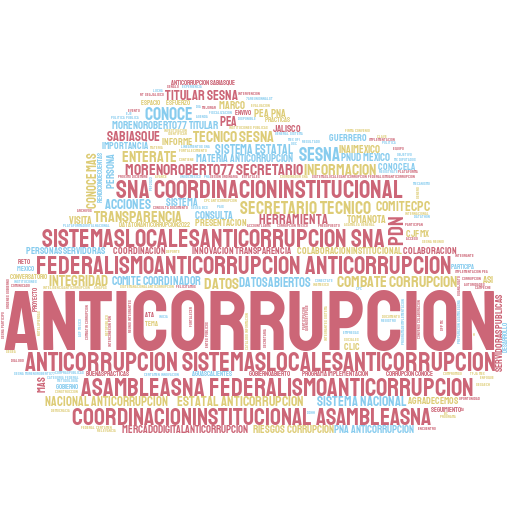

In [538]:
# Creamos nuestra nube de palabras 
for doc in sesna["New"].unique():
    display(get_wordcloud(" ".join(sesna.loc[sesna["New"] == doc, 'full_text'])))

df["full_text2"] = df["full_text"].map(clean_text)

Este código crea una nueva columna en el DataFrame con nombre "full_text2". 

La columna "full_text" del DataFrame contiene textos de comentarios. Se utiliza la función clean_text() para procesar cada texto y eliminar las etiquetas HTML, carácteres de puntuación, numéricos y de escape, y también para transformar todas las letras en minúsculas. 

La función map() se aplica a cada elemento de la columna "CONTENT", y el resultado se almacena en la nueva columna "full_text2". 

El objetivo es tener una versión más limpia y uniforme del contenido de los comentarios para realizar un análisis de texto.

# Segunda parte Tokenizacion para el Análisis de sentimientos

In [539]:
# populate word2idx
# convert documents into sequences of ints / ids / indices
idx = 0
word2idx = {}
tokenized_docs = []
for doc in sesna['full_text']:                      # Cada uno de los texto los vamos a convertir a minusculas y despues con word_tokenize
    words = word_tokenize(doc.lower())             # Los tokenizamos, una lista
                                        
        
    doc_as_int = []                         
    for word in words:
        if word not in word2idx:            # En esta parte del código le agregamos un contador a cada palabra para saber
            word2idx[word] = idx            # Cuantas tenemos
            idx += 1
            
        # save for later
        doc_as_int.append(word2idx[word])
        tokenized_docs.append(doc_as_int)

In [229]:
#words
#word2idx
#word2idx.items()
#sesna['full_text'][1]

In [540]:
# reverse mapping 
# if you do it smarter you can store it as a list
idx2word = {v:k for k, v in word2idx.items()}             #En esta línea solo ponemos el contador al principio de cada palabra
#idx2word

In [541]:
# Number of documents
N = len(sesna['full_text']) #Número de documentos o Tweets
V = len(word2idx)           #Número de elementos que hay, (Palabras, Emojis, carácteres)
#P = len(idx2word)
N,V#,P

(1000, 2797)

In [284]:
#word2idx
#idx2word

In [285]:
#Al parecer si se puede comenzar a limpiar o eliminar los tokens :)

In [542]:
lemmatizer = WordNetLemmatizer()

In [543]:
# Con esta función podemos etiquetar cada uno de nuestros tokens y asi poder clasificarlos.
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):      # Si comienza con "J" es una adejtivo.
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):    # Si comienza con "V" un verbo y asi podemos llevar esos tokens a su verbo base.
        return wordnet.VERB
    elif treebank_tag.startswith('N'):    # Si comienzan con "N" no nos brinda valor.
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):    # lo Mismo sucede con esta línea.
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [544]:
words = []
words2 = []
for i in range(len(sesna['full_text'])):
    
    words = word_tokenize(sesna['full_text'][i].lower())   # En esta parte del Código es para tokenizar nuestros tweets
    words2.append(words)                                   # Aqui guardamos los tweets tokenizados.

In [545]:
verbs = []
verbs2 = []
for i in range(len(words2)):
    verbs = nltk.pos_tag(words2[i])   # Los clasificamos con pos_tag, para saber si son verbos, adverbios, Nouns, etc.
    verbs2.append(verbs)                  # Guardamos cada tweet tokenizado con su clasificación correspondiente a cada token.

In [546]:
lemma = []
lemma2 = []
for i in range(len(verbs2)):
    for word, tag in verbs2[i]:
            lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))    # Aqui utilizamos la función para llevar el verbo
            lemma2.append(lemma)                                            # a su forma base
            #print(lemma, end=' ')

In [547]:
sentiment = SentimentIntensityAnalyzer()
sentiment.polarity_scores("Hello bad pain World")

{'neg': 0.773, 'neu': 0.227, 'pos': 0.0, 'compound': -0.7783}

In [548]:
sesna["polarity"] = sesna["full_text"].map(lambda x: sentiment.polarity_scores(x)["compound"])

La función polarity_scores de la clase SentimentIntensityAnalyzer devuelve un diccionario con cuatro claves: neg, neu, pos, y compound. Compound representa una métrica de polaridad que va de -1 (muy negativo) a 1 (muy positivo).

Se aplica la función polarity_scores a cada texto en la columna "full_text" usando la función map en conjunto con una función lambda que extrae el valor de Compound del diccionario resultante y lo asigna a la columna "polarity".

#Conclusión:El código está creando una nueva columna "polarity" en el DataFrame, la cual contiene el valor de polaridad de cada texto en la columna "full_text".

<AxesSubplot:xlabel='polarity', ylabel='Count'>

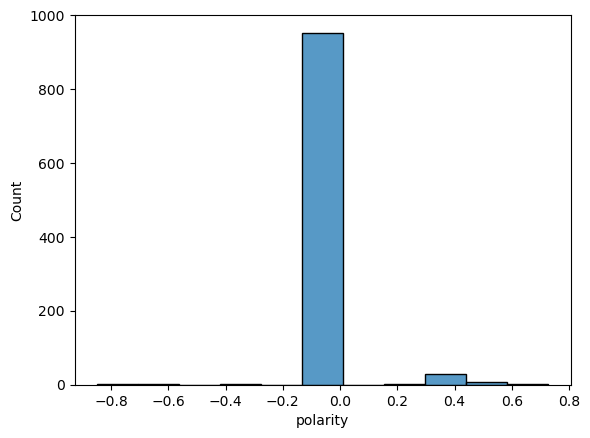

In [549]:
#sesna["polarity"].iplot(kind="hist")
#sesna["polarity"].hist()
sns.histplot(sesna['polarity'])

La función polarity_scores de la clase SentimentIntensityAnalyzer devuelve un diccionario con cuatro claves: neg, neu, pos, y compound. Compound representa una métrica de polaridad que va de -1 (muy negativo) a 1 (muy positivo).

Se aplica la función polarity_scores a cada texto en la columna "full_text" usando la función map en conjunto con una función lambda que extrae el valor de Compound del diccionario resultante y lo asigna a la columna "polarity".

#Conclusión:El código está creando una nueva columna "polarity" en el DataFrame, la cual contiene el valor de polaridad de cada texto en la columna "full_text".

<AxesSubplot:>

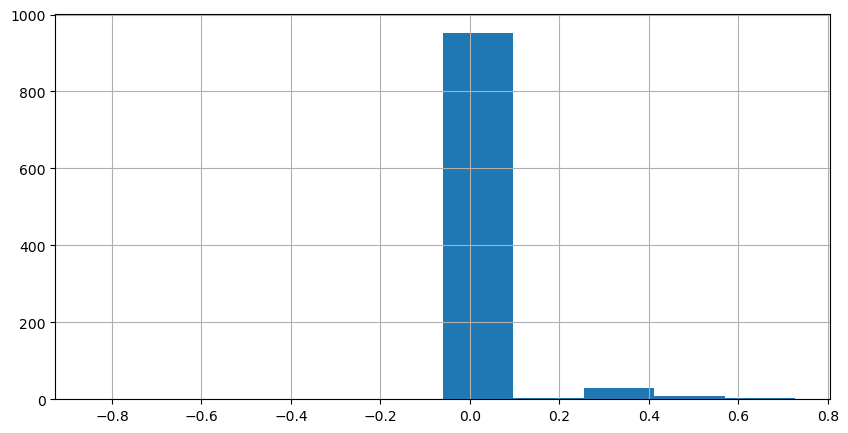

In [550]:
sesna['polarity'].hist(figsize=(10,5))

## Ahora vamos a intentar vectorizar